## MNIST / tSNE (t distributed stochastic neighbourhood embedding)

In [4]:
#importing modules basic

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn import manifold

In [5]:
#data from modules

data = datasets.fetch_openml("mnist_784", version=1, return_X_y=True)

In [6]:
data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [7]:
pixel_values,target = data #feature target mapping

In [8]:
target
target = target.astype(int) #datatype conversion from string to int

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

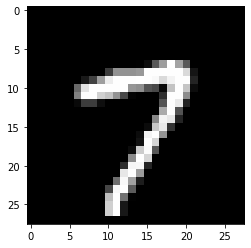

In [16]:
single_image = pixel_values[100,:].reshape(28,28)
single_image = pixel_values[103].reshape(28,28)
plt.imshow(single_image, cmap="gray")

In [17]:
#tsne implementation

tsne = manifold.TSNE(n_components=2, random_state=99)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [29]:
tsne_df = pd.DataFrame( np.column_stack((transformed_data, target[:3000])), columns=["x", "y", "targets"])
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

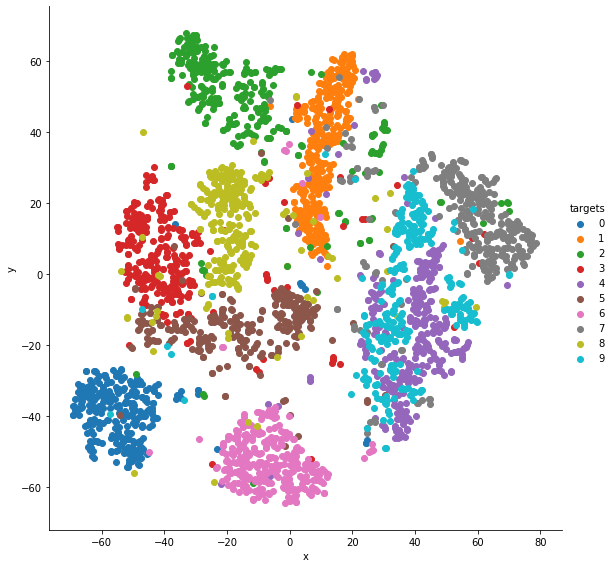

In [33]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()

## Wine quality prediction

In [34]:
import pandas as pd
df = pd.read_csv("datasets_4458_8204_winequality-red.csv")

In [35]:
#Considering as classification problem
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [36]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [37]:
#Only values from 3 to 8 available, so mapping from 0 to 5
quality_map = {3:0, 4:1, 5:2, 6:3, 7:4, 8:5}

In [39]:
df.loc[:,"quality"] = df.quality.map(quality_map)

In [40]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,2
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,4
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,4
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,2


In [41]:
df.quality.value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [42]:
len(df)

1599

In [46]:
#Sampling ===> random shuffling
df = df.sample(frac=1).reset_index(drop=True)

In [47]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.5,0.585,0.18,2.1,0.078,5.0,30.0,0.99670,3.20,0.48,9.8,3
1,7.4,0.580,0.00,2.0,0.064,7.0,11.0,0.99562,3.45,0.58,11.3,3
2,7.9,0.580,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5,3
3,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.5,2
4,6.5,0.530,0.06,2.0,0.063,29.0,44.0,0.99489,3.38,0.83,10.3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,5.7,0.600,0.00,1.4,0.063,11.0,18.0,0.99191,3.45,0.56,12.2,3
1595,6.9,0.560,0.03,1.5,0.086,36.0,46.0,0.99522,3.53,0.57,10.6,2
1596,8.3,0.300,0.49,3.8,0.090,11.0,24.0,0.99498,3.27,0.64,12.1,4
1597,7.6,0.360,0.31,1.7,0.079,26.0,65.0,0.99716,3.46,0.62,9.5,3


In [48]:
#Total 1599 data (train 1000 + test 599)

df_train = df.head(1000)
df_test = df.tail(599)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [50]:
#depth = 3 for testing

dec = DecisionTreeClassifier(max_depth=3)

In [51]:
cols = df.columns

In [53]:
#For testing purpose taking all features in to account
cols_indep = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']

In [54]:
dec.fit(df_train[cols_indep], df_train.quality)
train_predictions = dec.predict(df_train[cols_indep])
test_predictions = dec.predict(df_test[cols_indep])

In [55]:
train_predictions

array([2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3,
       3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3,
       2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2,
       2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3,
       2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
       3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3,
       3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2,
       3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3,

In [56]:
test_predictions

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2,
       2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3,
       2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3,
       2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3,
       3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2,
       3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2,
       3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3,
       2, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3,

In [57]:
train_accuracy = accuracy_score(df_train.quality,train_predictions)
train_accuracy

0.592

In [58]:
test_accuracy = accuracy_score(df_test.quality,test_predictions)
test_accuracy

0.5392320534223706

## Kfold validation Testing

In [106]:
df = pd.read_csv("datasets_4458_8204_winequality-red.csv")

In [107]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [109]:
#shuffling the data
df = df.sample(frac=1).reset_index(drop=True)

In [110]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.0,0.310,0.47,2.6,0.085,14.0,33.0,0.99965,3.36,0.80,10.5,7
1,6.4,0.865,0.03,3.2,0.071,27.0,58.0,0.99500,3.61,0.49,12.7,6
2,9.3,0.360,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,6
3,7.0,0.570,0.02,2.0,0.072,17.0,26.0,0.99575,3.36,0.61,10.2,5
4,7.3,0.580,0.30,2.4,0.074,15.0,55.0,0.99680,3.46,0.59,10.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,13.2,0.460,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.0,6
1595,12.4,0.400,0.51,2.0,0.059,6.0,24.0,0.99940,3.04,0.60,9.3,6
1596,9.7,0.320,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,5
1597,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5,6


In [111]:
from sklearn.model_selection import KFold,StratifiedKFold

In [112]:
#kf = StratifiedKFold(n_splits = 5)
kf = KFold(n_splits = 5)

In [113]:
df['kfold'] = -1

In [114]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,10.0,0.310,0.47,2.6,0.085,14.0,33.0,0.99965,3.36,0.80,10.5,7,-1
1,6.4,0.865,0.03,3.2,0.071,27.0,58.0,0.99500,3.61,0.49,12.7,6,-1
2,9.3,0.360,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,6,-1
3,7.0,0.570,0.02,2.0,0.072,17.0,26.0,0.99575,3.36,0.61,10.2,5,-1
4,7.3,0.580,0.30,2.4,0.074,15.0,55.0,0.99680,3.46,0.59,10.2,5,-1


In [115]:
for fold,(trn_, val_) in enumerate(kf.split(X=df,y=df.quality.values)):
    df.loc[val_, 'kfold'] = fold

In [116]:
df.kfold.value_counts()

3    320
2    320
1    320
0    320
4    319
Name: kfold, dtype: int64

In [117]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
1594,13.2,0.460,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.0,6,4
1595,12.4,0.400,0.51,2.0,0.059,6.0,24.0,0.99940,3.04,0.60,9.3,6,4
1596,9.7,0.320,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,5,4
1597,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5,6,4
1598,7.8,0.600,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5,4


Text(0, 0.5, 'COUNT')

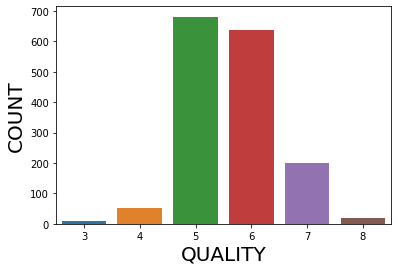

In [108]:
#Normal data
plot = sns.countplot(x = "quality", data=df)
plot.set_xlabel("QUALITY", fontsize=20)
plot.set_ylabel("COUNT", fontsize=20)

Text(0, 0.5, 'COUNT')

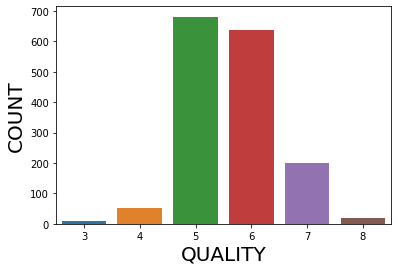

In [105]:
#KFold quality ratio
plot = sns.countplot(x = "quality", data=df)
plot.set_xlabel("QUALITY", fontsize=20)
plot.set_ylabel("COUNT", fontsize=20)

Text(0, 0.5, 'COUNT')

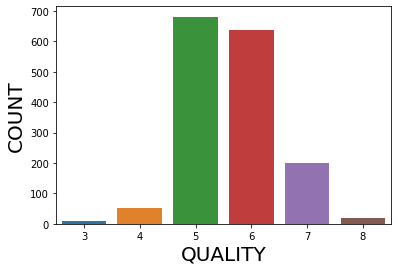

In [118]:
#Stratified KFold quality ratio
plot = sns.countplot(x = "quality", data=df)
plot.set_xlabel("QUALITY", fontsize=20)
plot.set_ylabel("COUNT", fontsize=20)